In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import numpy as np
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
import pickle

In [3]:
MNM_nb_folder = os.path.join('..', '..', '..', 'side_project', 'network_builder')
sys.path.append(MNM_nb_folder)
python_lib_folder = os.path.join('..', '..', 'pylib')
sys.path.append(python_lib_folder)

In [4]:
from MNM_nb import *
import MNMAPI
from sDODE import *

In [5]:
data_folder = os.path.join('..', '..', '..', 'data', 'input_files_SR41_fix2')

In [54]:
plt.style.use('seaborn-poster')

In [6]:
nb = MNM_network_builder()
nb.load_from_folder(data_folder)
usefuk_link_list = list(filter(lambda x: x.typ == 'CTM', nb.link_list))

MNM_config
MNM_pathtable


In [7]:
[true_q_para, sdode] = pickle.load(open('sr41logit_true2.pickle', 'rb'))
config = sdode.config

In [8]:
num_interval = nb.config.config_dict['DTA']['max_interval']
theta = 0.01

In [9]:
O_dist = np.arange(174)
D_dist = np.arange(174)

In [10]:
sdode = SDODE(nb, config)

In [11]:
demand_mean_list  = list()
for i in range(sdode.num_assign_interval):
    tmp_arr = np.zeros(len(nb.demand.demand_list))
    for j, (O,D) in enumerate(nb.demand.demand_list):
        tmp_arr[j] = nb.demand.demand_dict[O][D][i]
    demand_mean_list.append(tmp_arr)

In [12]:
true_q = np.concatenate(true_q_para.demand_mean_list)
P = sdode.nb.get_route_portion_matrix()
true_f = P.dot(true_q)

In [13]:
dta = sdode._run_simulation(true_f)
true_P = sdode.nb.get_route_portion_matrix()
true_full_dar = sdode.get_full_dar(dta, true_f)
true_dar = true_full_dar[sdode.get_full_observed_link_index(),:]
full_true_x = true_full_dar.dot(true_f)
true_x = true_dar.dot(true_f)
true_path_cost = dta.get_path_tt(np.arange(0, sdode.num_loading_interval, sdode.ass_freq))

In [14]:
data_dict = pickle.load(open('sr41data_dict2.pickle', 'rb'))

In [17]:
data_folder1 = os.path.join('sr41save')
save_list1 = list()
for i in range(100):
    [loss, q_para] = pickle.load(open(os.path.join(data_folder1, str(i)+'iteration.pickle'), 'rb'))
    save_list1.append([loss, q_para])
    
data_folder2 = os.path.join('sr2', 'standsave')
save_list2 = list()
for i in range(100):
    [loss, q_e] = pickle.load(open(os.path.join(data_folder2, str(i)+'iteration.pickle'), 'rb'))
    save_list2.append([loss, q_e])

In [19]:
loss_list1 = list(map(lambda x: x[0], save_list1))
loss_list2 = list(map(lambda x: x[0], save_list2))

In [81]:
loss_list2

[7584.6189512738365,
 4687.3201289877325,
 3251.9291804491595,
 2599.7603596675185,
 2257.0336344137927,
 2121.2641058673203,
 2077.2789413794826,
 2024.254946964656,
 2083.0793179599204,
 2072.093533889325,
 2166.1975154399456,
 2156.1061338072764,
 2229.4368467455206,
 1868.9031093964265,
 1812.8317657269413,
 1872.0117931163745,
 1865.200104225003,
 1934.584548783163,
 2056.441877936415,
 1970.1683276609244,
 2040.402247218548,
 2154.0387498971554,
 2056.016627913195,
 2066.741716955953,
 2141.891535500765,
 2128.3885655045015,
 2156.09299904282,
 2049.0209532230374,
 2168.728852523047,
 1856.7643763722003,
 1875.790482970427,
 2032.8669661778488,
 1886.8426224341554,
 1973.9573006517226,
 1918.1302164118592,
 1955.8424438047794,
 2033.270229599034,
 1791.1586973063884,
 1935.0167150488328,
 1996.180015346111,
 2039.5208676111354,
 1924.7469062001414,
 2039.7950929879094,
 2054.678525763477,
 2026.3273457455748,
 1931.4585500088972,
 2061.373883850906,
 1952.4841706421757,
 2261.286

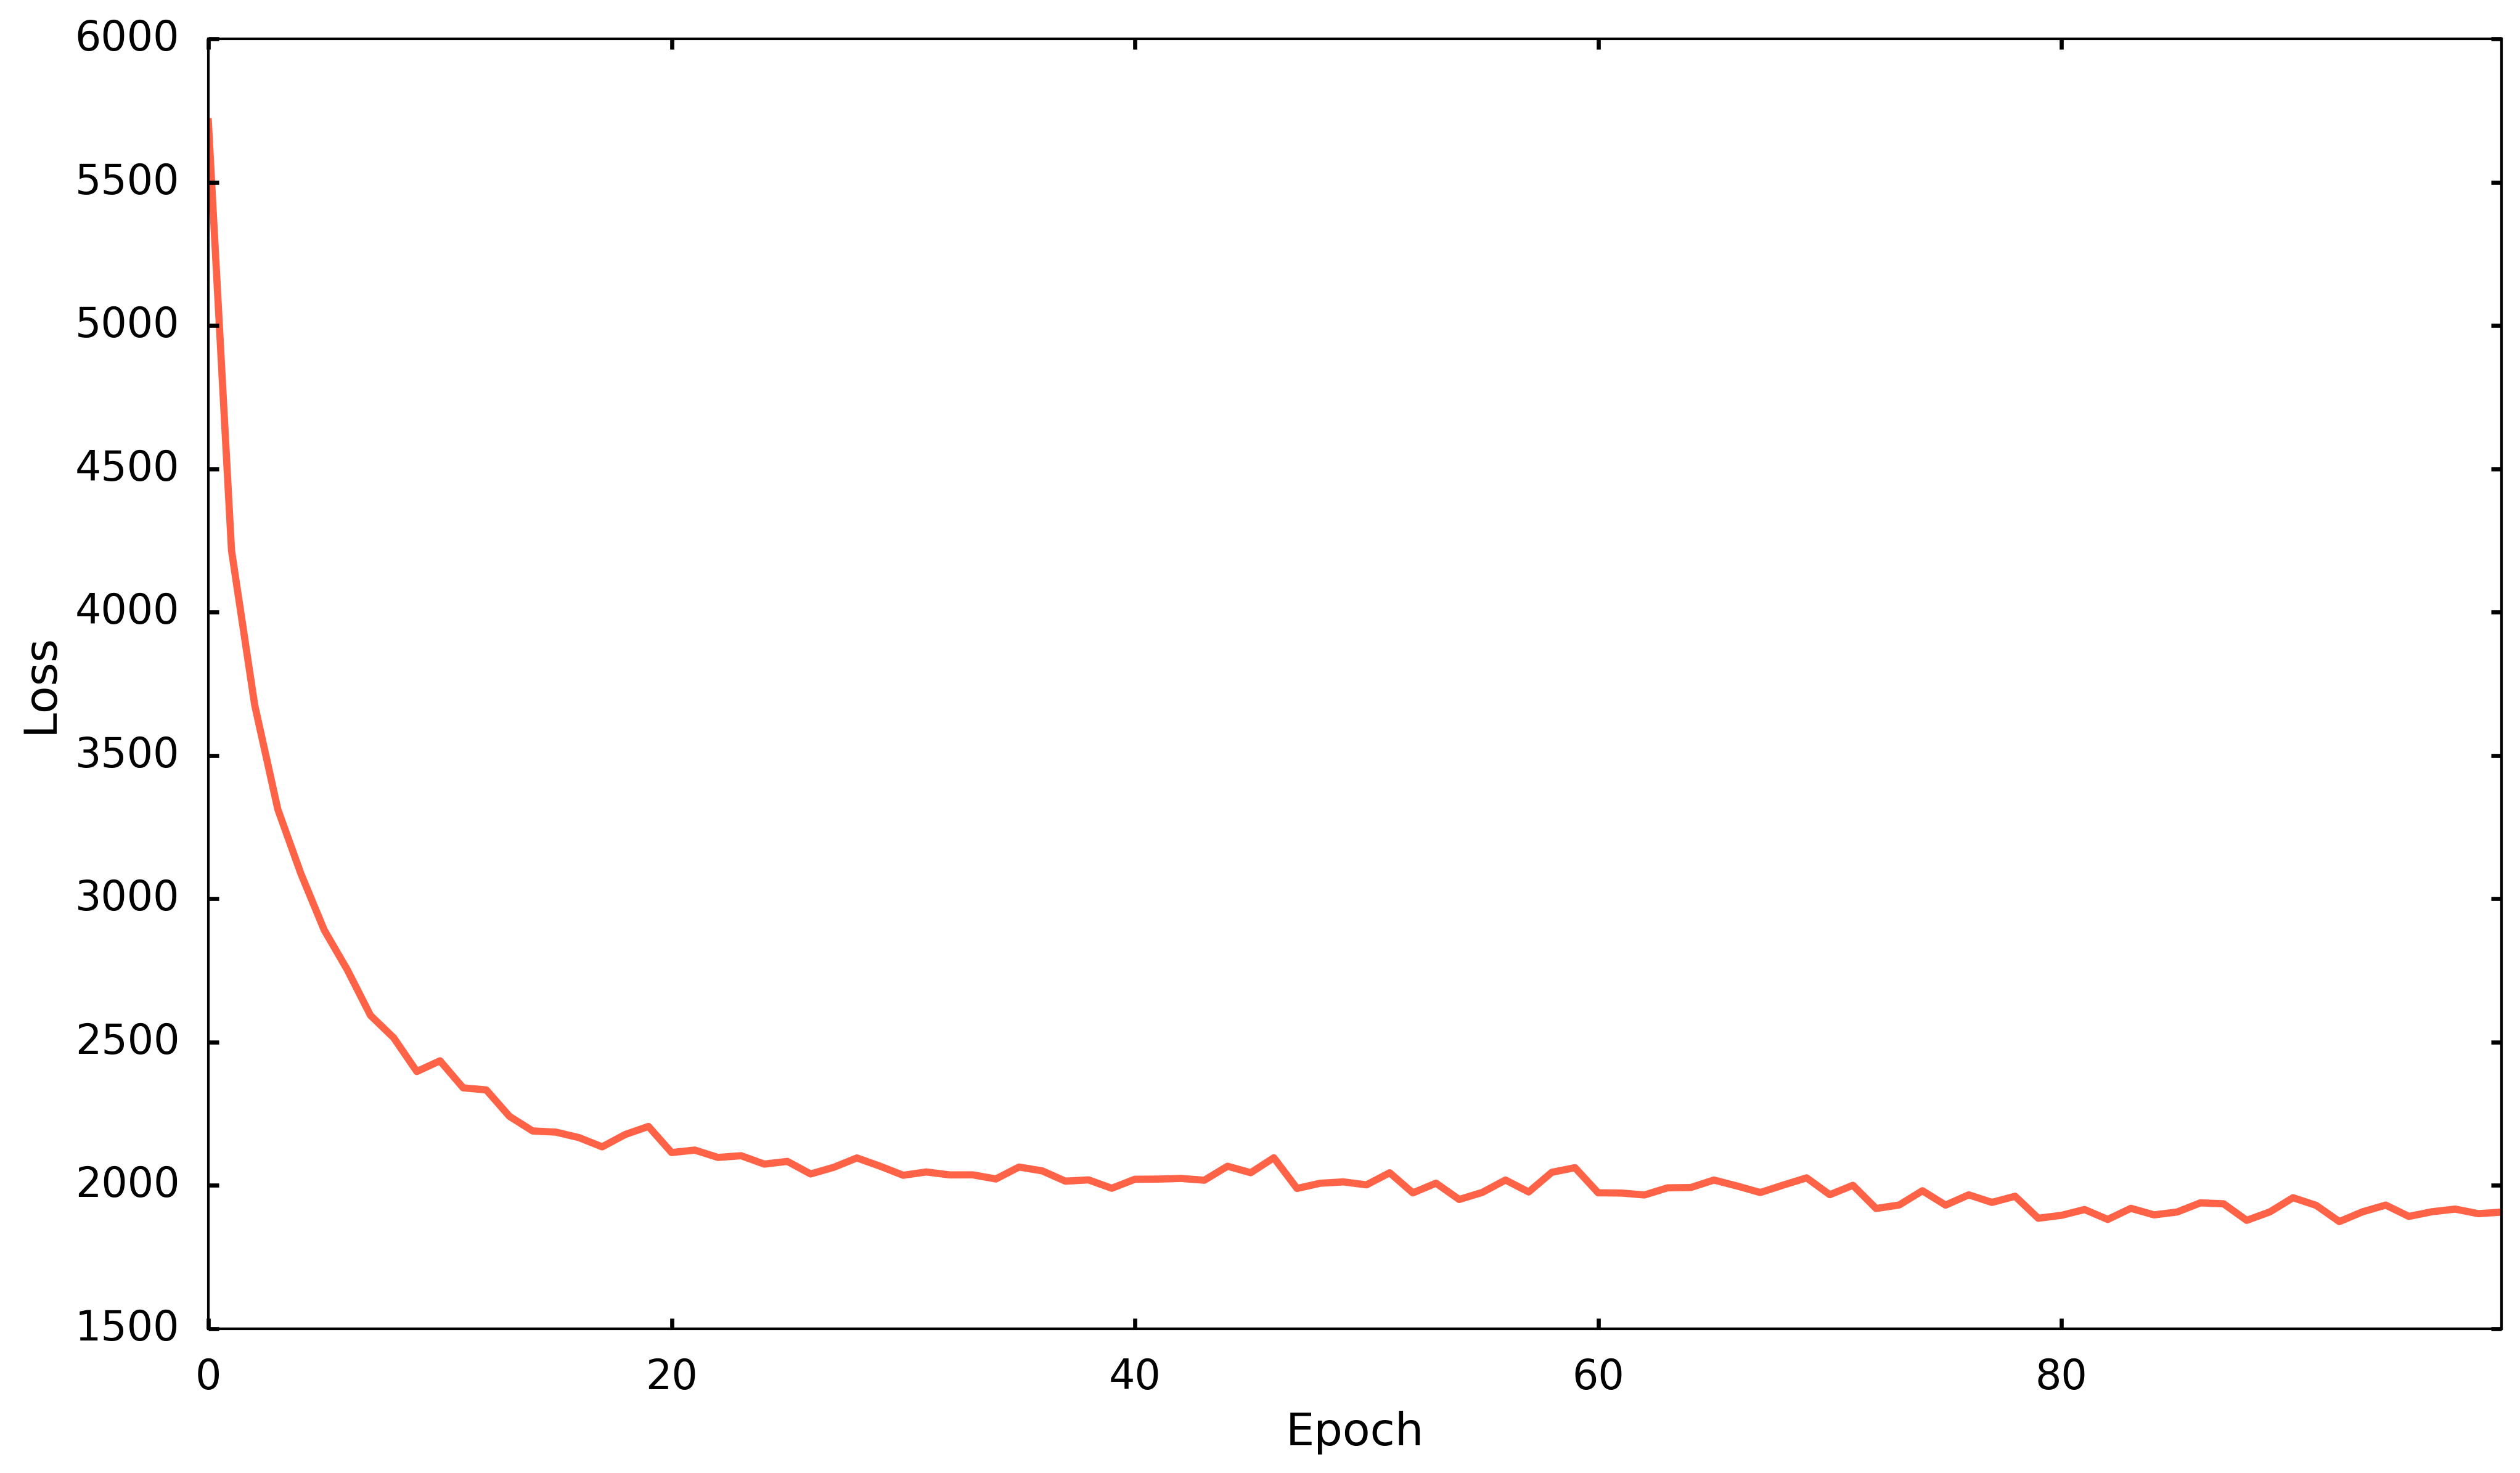

In [66]:
plt.figure(figsize = (16,9), dpi = 300)
plt.plot(range(100), loss_list1[:100], label = 'PDODE', color = 'tomato')
# plt.plot(range(100), loss_list2[:100], label = 'DODE', color = 'teal', linestyle = "--")
# plt.legend()
plt.xlabel("Epoch")
plt.ylabel('Loss')
plt.xlim([0, 99])
plt.show()

In [26]:
q_ee = np.concatenate(q_para.demand_mean_list)
# P_ee = sdode.nb.get_route_portion_matrix()
f_ee = true_P.dot(q_ee)
dta = sdode._run_simulation(f_ee)
full_dar_ee = sdode.get_full_dar(dta, f_ee)
dar_ee = full_dar_ee[sdode.get_full_observed_link_index(),:]
x_ee = dar_ee.dot(f_ee)
full_x_ee = full_dar_ee.dot(f_ee)

In [38]:
f_ee.sum()

49498.32452209388

In [82]:
# P_e = sdode.nb.get_route_portion_matrix()
q_e = save_list2[-3][1]
f_e = true_P.dot(q_e)
dta = sdode._run_simulation(f_e)
full_dar_e = sdode.get_full_dar(dta, f_e)
dar_e = full_dar_e[sdode.get_full_observed_link_index(),:]
x_e = dar_e.dot(f_e)
full_x_e = full_dar_e.dot(f_e)

In [37]:
f_e.sum()

46053.886408231534

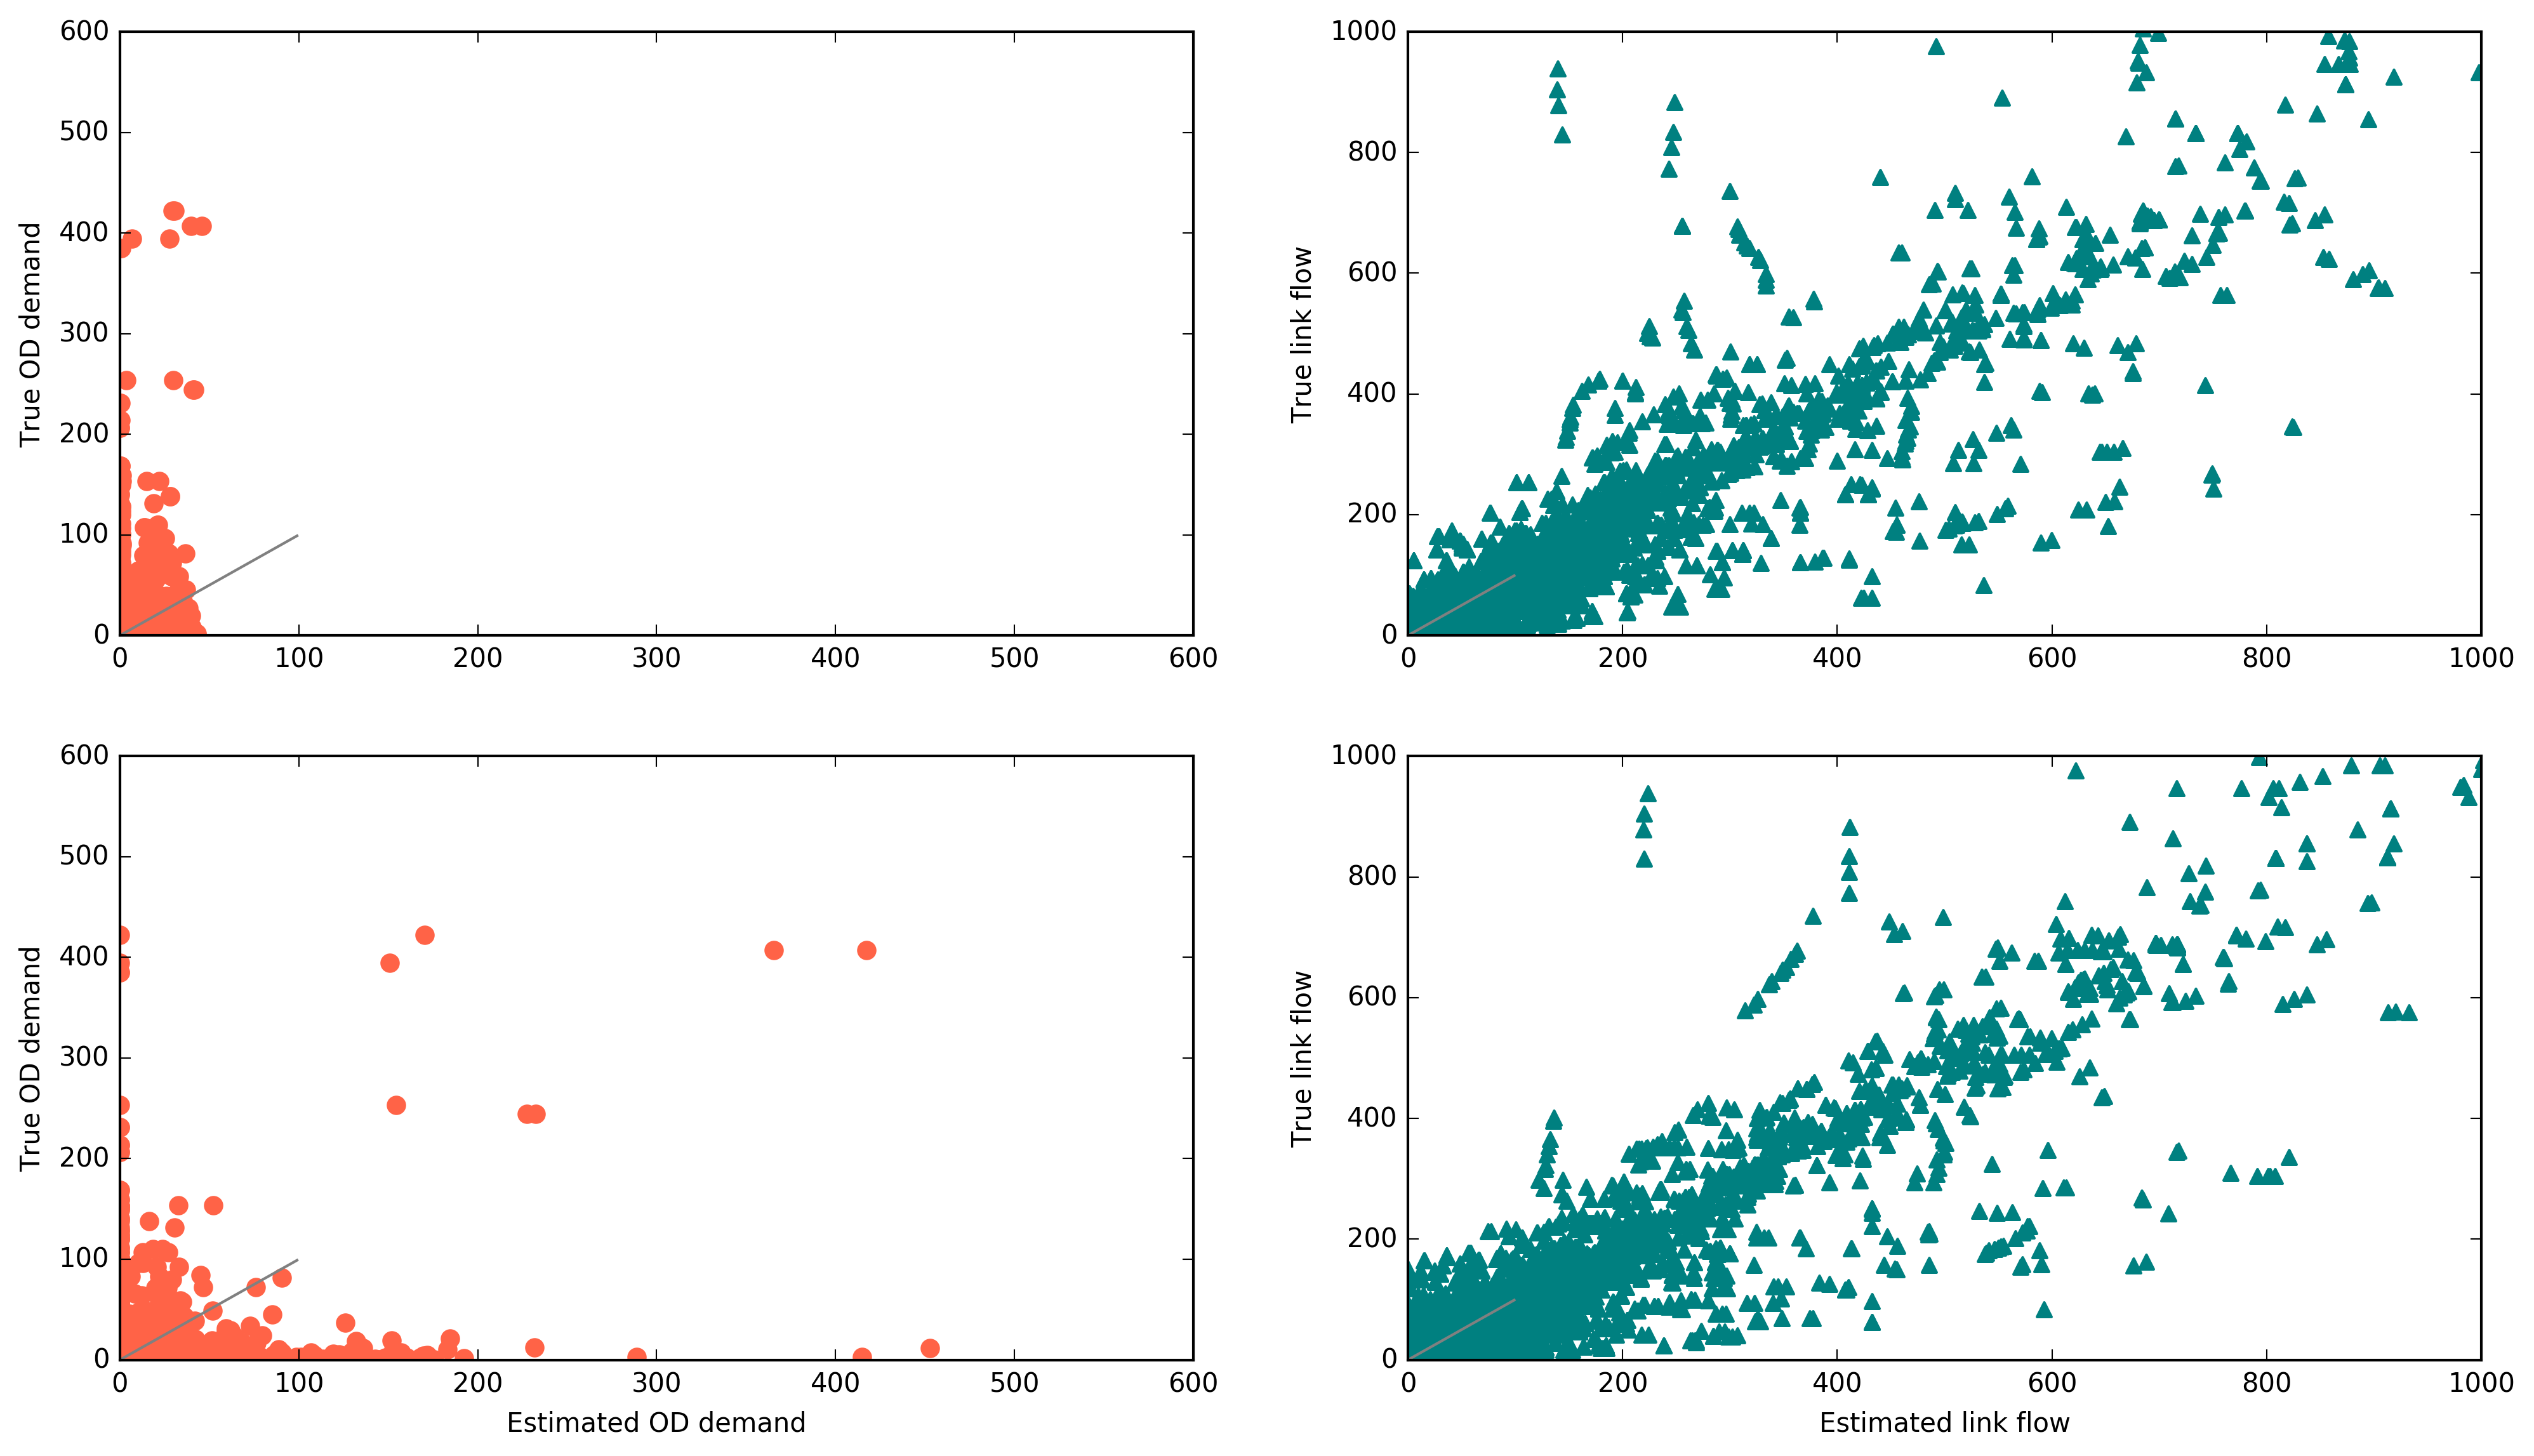

In [30]:
fig, axes = plt.subplots(2,2,  figsize=(16, 9), dpi=300)

axes[0][0].plot(range(100), range(100), color = 'grey')
axes[0][1].plot(range(100), range(100), color = 'grey')
axes[1][0].plot(range(100), range(100), color = 'grey')
axes[1][1].plot(range(100), range(100), color = 'grey')

axes[0][0].scatter(np.concatenate(q_para.demand_mean_list), np.concatenate(true_q_para.demand_mean_list), 
                   color = 'tomato', s = 40)
axes[0][1].scatter(full_x_ee, full_true_x, color = 'teal', s = 30, marker = "^")
axes[1][0].scatter(q_e, np.concatenate(true_q_para.demand_mean_list), color = 'tomato', s = 40)
axes[1][1].scatter(full_x_e, full_true_x, color = 'teal', s = 30, marker = "^")


axes[0][0].set_xlim([0, 600])
axes[0][0].set_ylim([0, 600])
axes[1][0].set_xlim([0, 600])
axes[1][0].set_ylim([0, 600])

axes[0][1].set_xlim([0, 1000])
axes[0][1].set_ylim([0, 1000])
axes[1][1].set_xlim([0, 1000])
axes[1][1].set_ylim([0, 1000])

axes[1][0].set_xlabel("Estimated OD demand")
axes[0][0].set_ylabel("True OD demand")
axes[1][0].set_ylabel("True OD demand")


axes[1][1].set_xlabel("Estimated link flow")
axes[0][1].set_ylabel("True link flow")
axes[1][1].set_ylabel("True link flow")


plt.show()

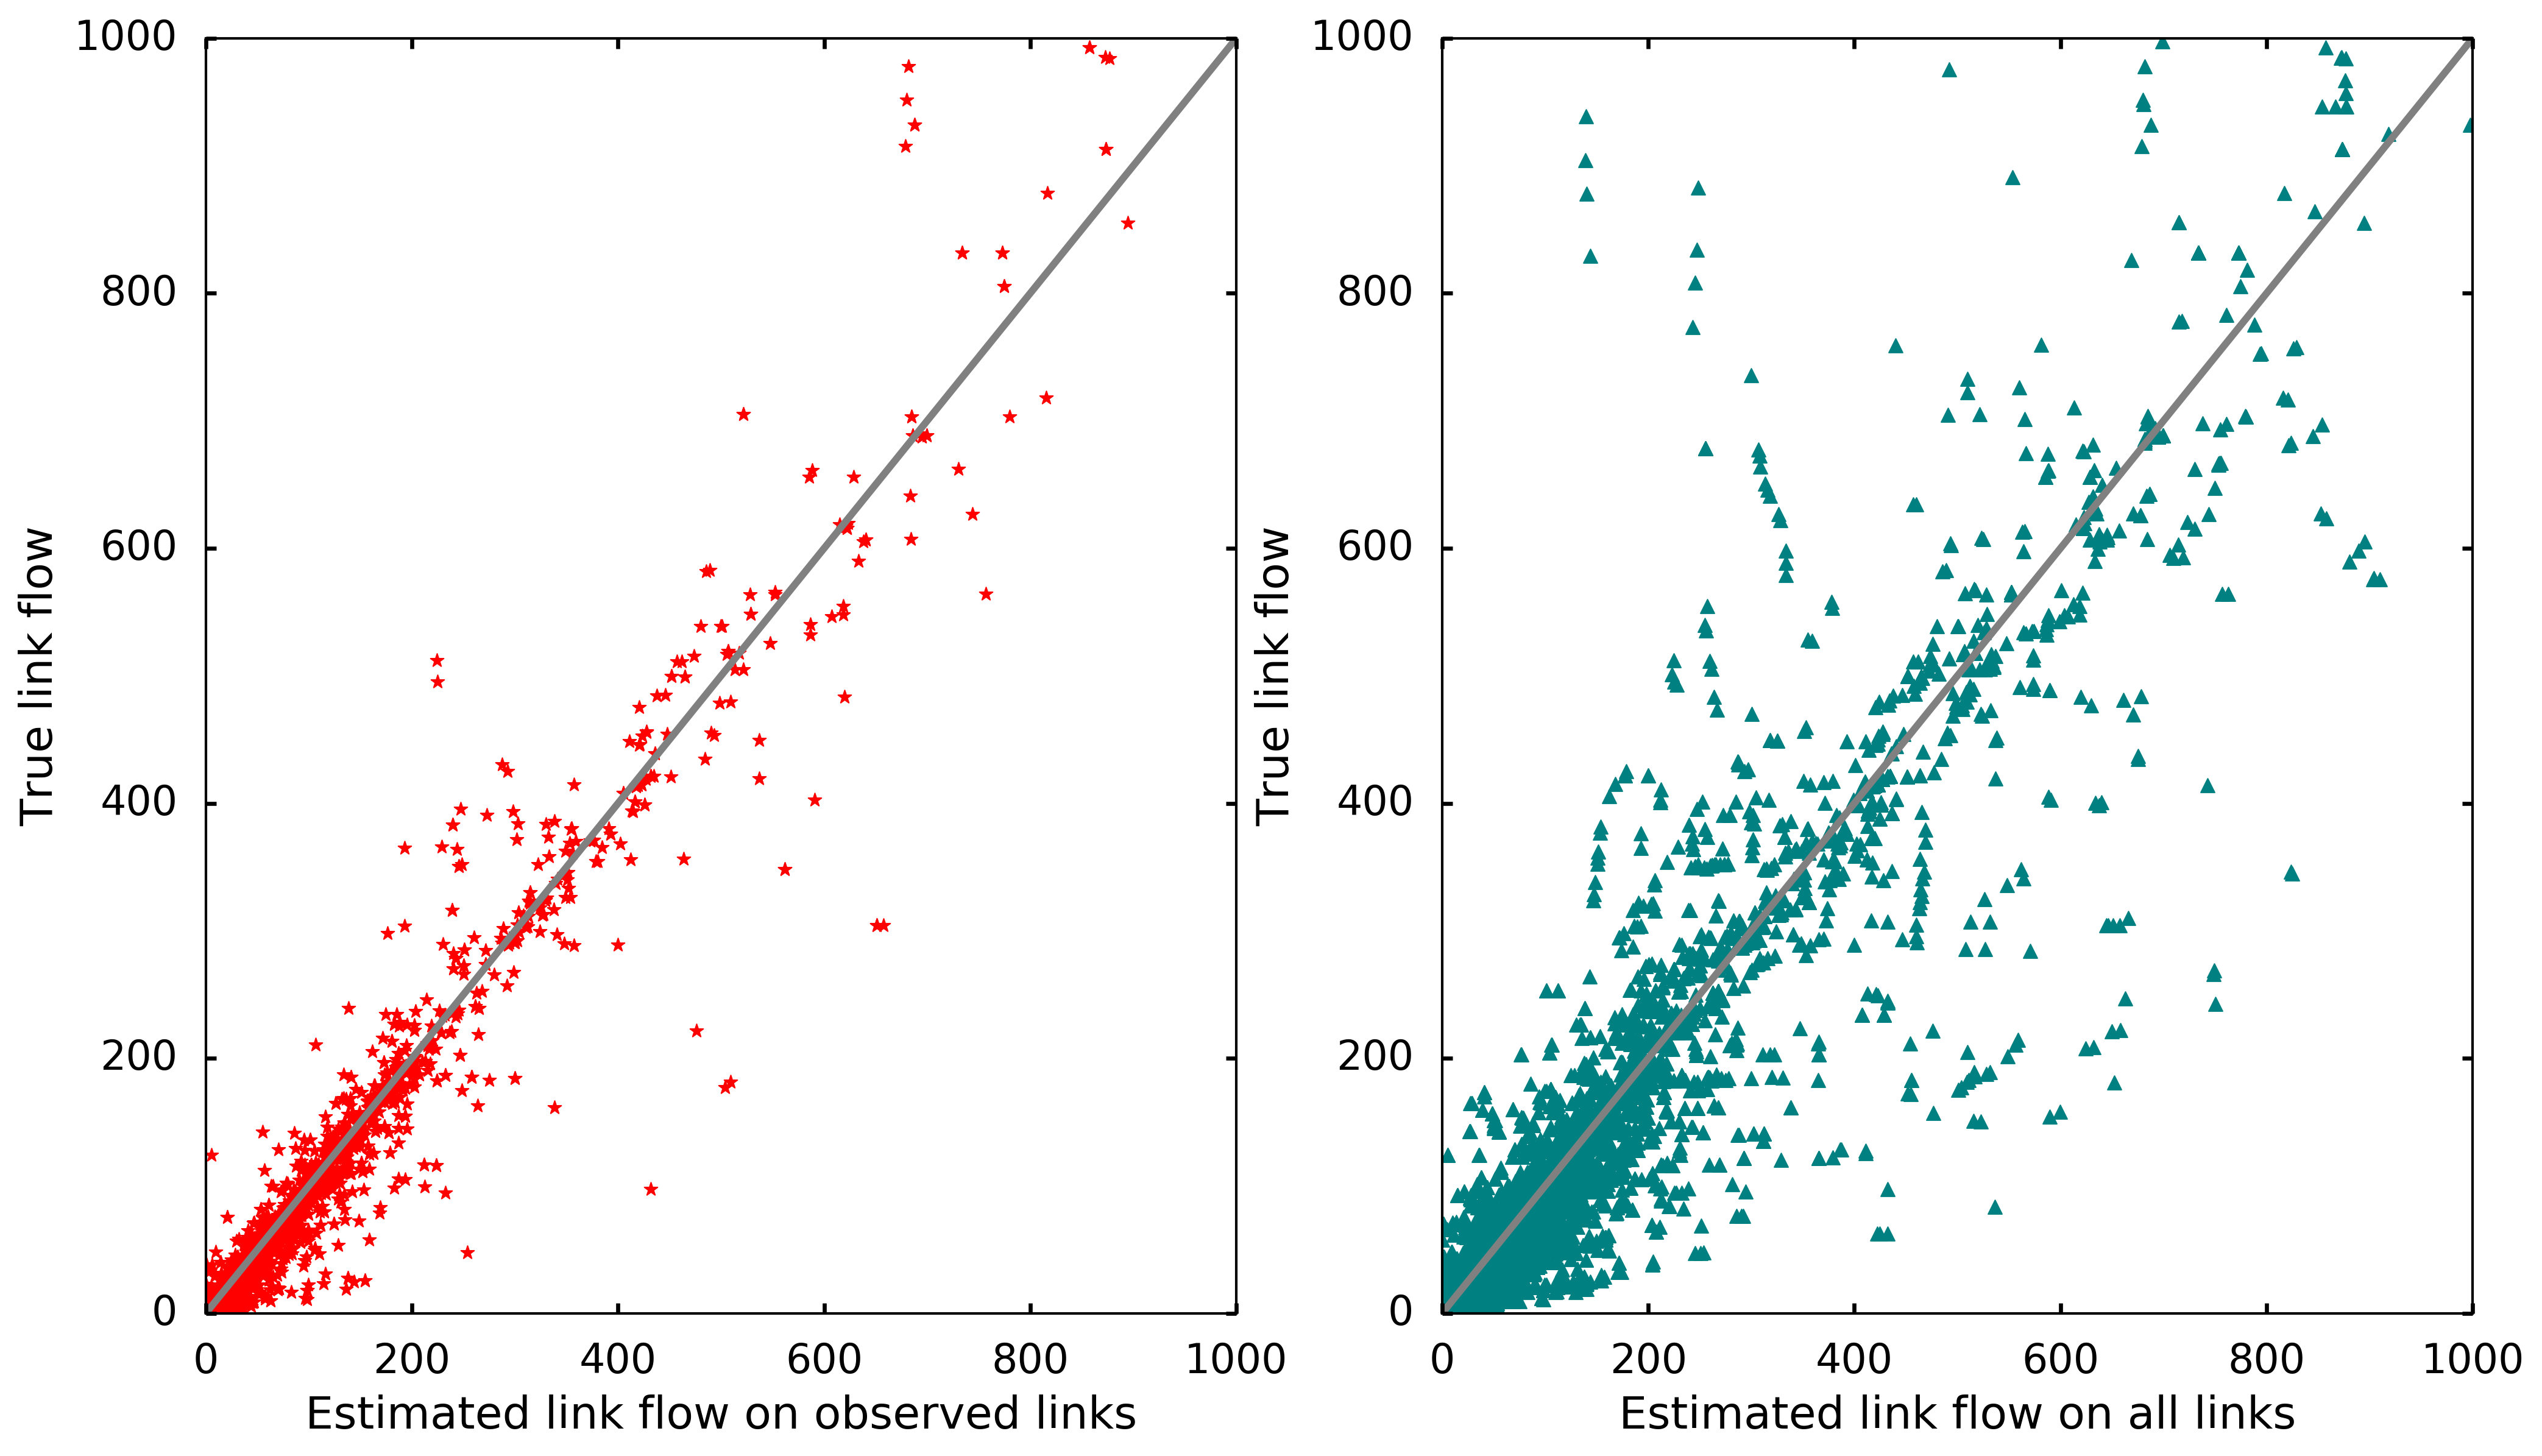

In [73]:
fig, axes = plt.subplots(1,2,  figsize=(16, 9), dpi=300)

axes = axes.reshape((1,2))

axes[0][0].plot(range(1000), range(1000), color = 'grey')
axes[0][1].plot(range(1000), range(1000), color = 'grey')
# axes[1][0].plot(range(1000), range(1000), color = 'grey')
# axes[1][1].plot(range(1000), range(1000), color = 'grey')
# axes[0][2].plot(range(100), range(100), color = 'grey')
# axes[1][2].plot(range(100), range(100), color = 'grey')

# axes[0][0].scatter(np.concatenate(q_para.demand_mean_list), np.concatenate(true_q_para.demand_mean_list), 
#                    color = 'tomato', s = 40)
axes[0][1].scatter(full_x_ee, full_true_x, color = 'teal', s = 30, marker = "^")
axes[0][0].scatter(x_ee, true_x, color = 'red', s = 30, marker = "*")

# axes[1][0].scatter(q_e, np.concatenate(true_q_para.demand_mean_list), color = 'tomato', s = 40)
# axes[1][1].scatter(full_x_e, full_true_x, color = 'teal', s = 30, marker = "^")
# axes[1][0].scatter(x_e, true_x, color = 'red', s = 30, marker = "*")

# axes[0][0].set_xlim([0, 60])
# axes[0][0].set_ylim([0, 60])
# axes[1][0].set_xlim([0, 60])
# axes[1][0].set_ylim([0, 60])

axes[0][1].set_xlim([0, 1000])
axes[0][1].set_ylim([0, 1000])
# axes[1][1].set_xlim([0, 1000])
# axes[1][1].set_ylim([0, 1000])

axes[0][0].set_xlim([0, 1000])
axes[0][0].set_ylim([0, 1000])
# axes[1][0].set_xlim([0, 600])
# axes[1][0].set_ylim([0, 600])

# axes[1][0].set_xlabel("Estimated OD demand")
# axes[0][0].set_ylabel("True OD demand")
# axes[1][0].set_ylabel("True OD demand")


axes[0][0].set_xlabel("Estimated link flow on observed links")
axes[0][0].set_ylabel("True link flow")
# axes[1][0].set_ylabel("True link flow")

axes[0][1].set_xlabel("Estimated link flow on all links")
axes[0][1].set_ylabel("True link flow")
# axes[1][1].set_ylabel("True link flow")

plt.show()

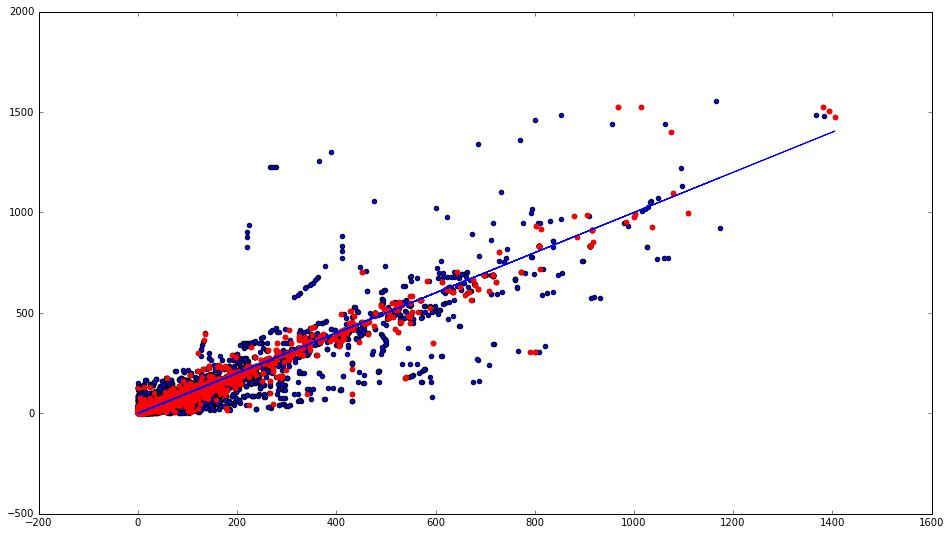

In [31]:
plt.figure(figsize = (16,9))
plt.scatter(full_x_e, full_true_x)
plt.scatter(x_e, true_x, color = 'red')
plt.plot(full_x_e,full_x_e)
plt.show()

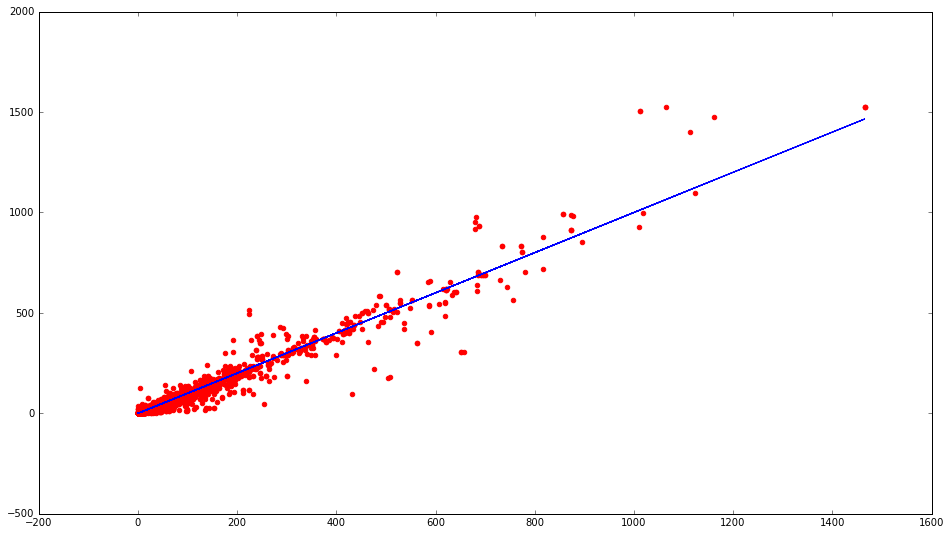

In [41]:
plt.figure(figsize = (16,9))
# plt.scatter(full_x_ee, full_true_x)
plt.scatter(x_ee, true_x, color = 'red')
plt.plot(full_x_ee,full_x_ee)
plt.show()

In [33]:
print np.linalg.norm(full_true_x - full_x_ee)
print np.linalg.norm(full_true_x - full_x_e)

6272.851163545938
5869.292202642484


In [34]:
print np.linalg.norm(true_x - x_ee)
print np.linalg.norm(true_x - x_e)

1972.4089231191242
2015.493011647514


In [42]:
from sklearn.metrics import r2_score
from scipy import stats
def r2(predictions, targets):
    y_bar = np.mean(targets)
    # diff = np.minimum(np.abs(predictions - targets), targets)
    diff = predictions - targets
    ss_e = np.sum(diff ** 2)
    ss_t = np.sum((targets) ** 2)
    return 1 - ss_e / ss_t

def rsquared(x, y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    return r_value**2

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

def rmsn(predictions, targets):
    return np.sqrt(np.sum((predictions - targets) ** 2) * len(predictions)) / np.sum(targets)

In [83]:
rsquared(x_ee, true_x)

0.9488248456545617

In [84]:
rsquared(x_e, true_x)

0.9548520350039458

In [85]:
rsquared(full_x_ee, full_true_x)

0.8504974499631032

In [86]:
rsquared(full_x_e, full_true_x)

0.8749429111197995

In [87]:
rsquared(q_ee, true_q)

0.04582088651365664